# Reconocimiento Dígitos DB MINST con CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importación de los datos

In [4]:
from keras.datasets import mnist

2025-12-30 15:45:38.572452: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Exploracion de los datos

In [9]:
print(X_train[0].shape)

(28, 28)


In [11]:
y_train[0]

5

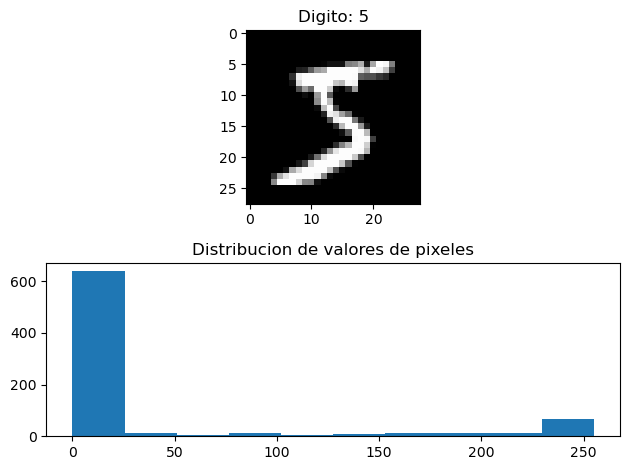

In [13]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digito: {}".format(y_train[0]))
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Distribucion de valores de pixeles")
plt.tight_layout()
plt.show()

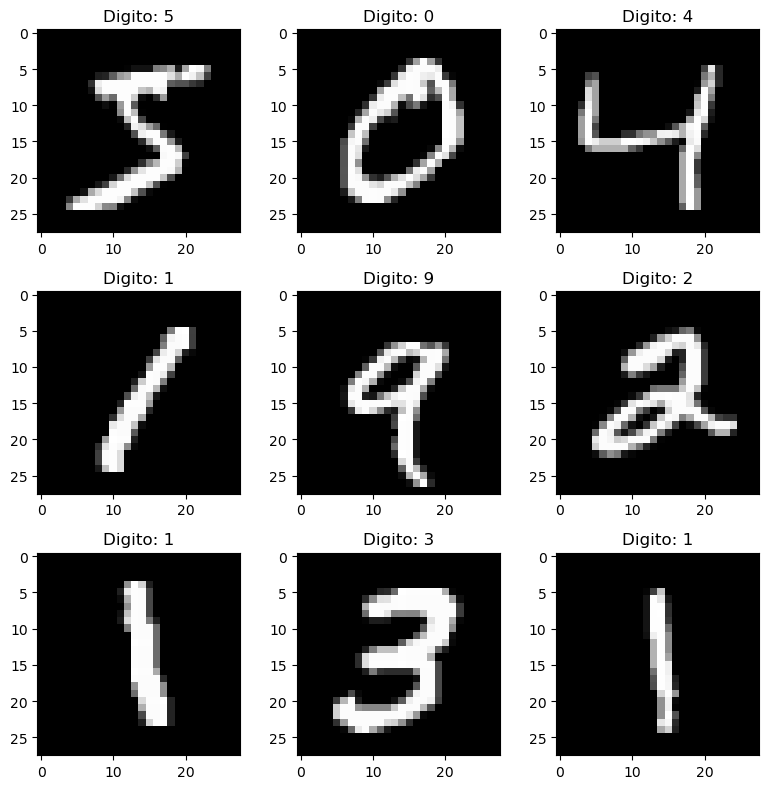

In [19]:
plt.figure(figsize=(8, 8)) # Recomendado para que no se vean amontonadas
for i in range(9): 
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Digito: {}".format(y_train[i]))
plt.show()

#### Preprocesamiento

Primero escalamos los datos, como los valores van de 0 a 255, basta solamente con dividir por 255

In [23]:
# Dividir por 255 para escalar valores en el rango [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Ahora, lo llevaremos de un shape (60000, 28, 28) lo transformaremos en un shape (60000, 28, 28, 1). Esto, porque así lo requiere keras:

In [26]:
# Cambiar el shape de X_train y X_test
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [28]:
# Verificación de los nuevos shapes
print("Nuevo shape de X_train:", X_train.shape)
print("Nuevo shape de X_test:", X_test.shape)

Nuevo shape de X_train: (60000, 28, 28, 1)
Nuevo shape de X_test: (10000, 28, 28, 1)


#### Seguimos con la transformación de la respuesta, se debe llevar a un vector

In [32]:
from tensorflow.keras.utils import to_categorical

In [34]:
# Convertir las etiquetas a vectores one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [36]:
# Verificaciones
print("Nuevo shape de y_train:", y_train.shape)
print("Muestra y_train[0]:", y_train[0])

Nuevo shape de y_train: (60000, 10)
Muestra y_train[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### Diseño de la Arquitectura de la Red

- Input vector: (28,28,1)

- Layer Conv2D: 32 capas con kernel de 3x3 con activacion relu
- Layer MaxPooling: con size de 2x2

- Layer Conv2D: 64 capas con kernel de 3x3 con activacion relu
- Layer MaxPooling: con size de 2x2

- Layer aplanamiento
- Layer Dropout de 0.5
- Layer Denso: con 10 categorías y activacion softmax

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [41]:
# Crear un modelo secuencial
model = Sequential()

In [43]:
# Primera capa Conv2D
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Primera capa MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa Conv2D
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Segunda capa MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanamiento
model.add(Flatten())

# Capa Dropout
model.add(Dropout(0.5))

# Capa Densa con salida softmax
model.add(Dense(10, activation='softmax'))

/Users/gio/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar el resumen de la arquitectura del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamiento del Modelo

In [48]:
# Entrenar el modelo
history = model.fit(
    X_train, y_train, 
    epochs=10,  # Puedes ajustar el número de épocas según sea necesario
    batch_size=128,  # Tamaño del lote
    validation_data=(X_test, y_test),  # Usar los datos de prueba para validación
    verbose=1  # Mostrar progreso del entrenamiento en la consola
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.7853 - loss: 0.7050 - val_accuracy: 0.9746 - val_loss: 0.0814
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9667 - loss: 0.1102 - val_accuracy: 0.9827 - val_loss: 0.0537
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9760 - loss: 0.0783 - val_accuracy: 0.9868 - val_loss: 0.0418
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9800 - loss: 0.0649 - val_accuracy: 0.9876 - val_loss: 0.0382
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9815 - loss: 0.0607 - val_accuracy: 0.9875 - val_loss: 0.0331
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9837 - loss: 0.0530 - val_accuracy: 0.9891 - val_loss: 0.0330
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 65ms/step - accuracy: 0.9843 - loss: 0.0483 - val_accuracy: 0.9896 - val_loss: 0.0287
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9858 - loss: 0.0447 - 

#### Métricas de Evaluación

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
# Obtener las predicciones del modelo
# `predict` te dará las probabilidades para cada clase, usamos `argmax` para tener la clase con mayor probabilidad como predicción final
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # Convertir las probabilidades en etiquetas predichas

# Convertir etiquetas verdaderas a un formato compatible si están en formato one-hot
y_true = np.argmax(y_test, axis=1)

# Calcular la precisión usando accuracy_score
accuracy = accuracy_score(y_true, y_pred)

# Mostrar el resultado
print(f"Precisión calculada con sklearn: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Precisión calculada con sklearn: 0.9917


In [56]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print("\nResultados del Modelo:")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9896 - loss: 0.0305

Resultados del Modelo:
Precisión en el conjunto de prueba: 0.9917
Pérdida en el conjunto de prueba: 0.0253


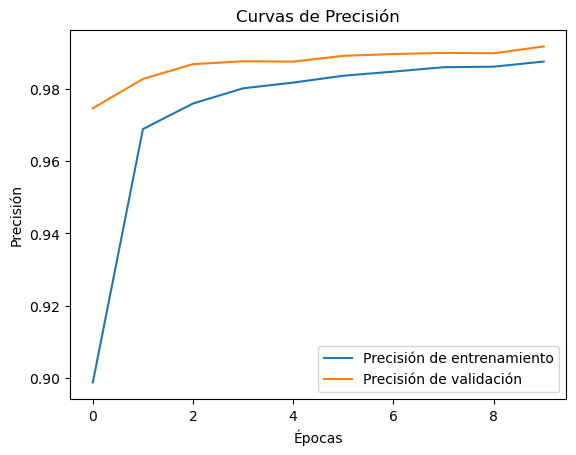

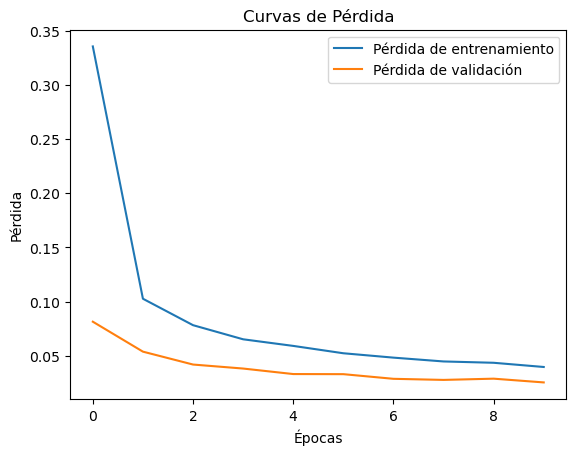

In [58]:
# Curvas de precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curvas de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Curvas de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curvas de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()